# Classification Task

**Dataset 1**  


    AV : Healthcare Analytics II  
    Task 1 : To predict the length of stay for each patient

    Task Details  
    The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

## Fetch the Data

Automate Dataset Fetching from Kaggle  
+ https://medium.com/@ankushchoubey/how-to-download-dataset-from-kaggle-7f700d7f9198

In [205]:
import subprocess
import os

datasets_dir = "D:/datasets/tabular/classification"

# task possible inputs:
# images
# sequences
# language
# tabular
    # classification
    # regression

task = "tabular/classification"
username = "nehaprabhavalkar"
dataset_name = "av-healthcare-analytics-ii"

# assumption: Kaggle API is installed with a kaggle.json API token
# run a dataset download kaggle cmd in shell and save it in a specified dir
def auto_fetch_kaggle_dataset(task, username, dataset_name, root_dir="D:/datasets/", capture_output=True):
    dataset_dir = root_dir + task + "/" + dataset_name
    if not os.path.isdir(dataset_dir):
        os.makedirs(dataset_dir)
    cmd = "kaggle datasets download -p " + dataset_dir + " -d " + username + "/" + dataset_name
    output = subprocess.run(cmd,
                            shell=True, capture_output=capture_output)
    return dataset_dir, output

dataset_dir, completed_process_output = auto_fetch_kaggle_dataset(task, username, dataset_name)

In [207]:
dataset_dir, completed_process_output

('D:/datasets/tabular/classification/av-healthcare-analytics-ii',
 CompletedProcess(args='kaggle datasets download -p D:/datasets/tabular/classification/av-healthcare-analytics-ii -d nehaprabhavalkar/av-healthcare-analytics-ii', returncode=0, stdout=b'av-healthcare-analytics-ii.zip: Skipping, found more recently modified local copy (use --force to force download)\r\n', stderr=b''))

In [209]:
from zipfile import ZipFile

# perform the fetching from before and extract its contents to the same directory
def fetch_extract_dataset(task, username, dataset_name, root_dir="D:/datasets/", capture_output=True):
    dataset_dir, output = auto_fetch_kaggle_dataset(task, username, dataset_name, root_dir, capture_output)
    zipfile_dir = dataset_dir + "/" + dataset_name + ".zip"
    with ZipFile(zipfile_dir, "r") as zipObj:
        zipObj.extractall(dataset_dir)

fetch_extract_dataset(task, username, dataset_name)

## Preview the Data

In [211]:
import pandas as pd
import numpy as np

# configurations to view all values
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

root_dir = "D:/datasets/tabular/classification/av-healthcare-analytics-ii/healthcare/"
attribute_desc_csv = "train_data_dictionary.csv"

# viewing attribute descriptions
attribute_descriptions = pd.read_csv(root_dir + attribute_desc_csv)

In [213]:
attribute_descriptions

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


+ assumptions:   
    + case_id is irrelevant (it is simply ordinally encoded with an index beginning at 1)
    + patientid is questionable (A/B test this, initially assumed it to be similar to case_id)
    + lots of categorical attributes so it is difficult to perform feature extraction

In [215]:
# loading training and testing data

train_csv = "train_data.csv"
test_csv = "test_data.csv"

train_data = pd.read_csv(root_dir + train_csv)
test_data = pd.read_csv(root_dir + test_csv)

In [217]:
# preview dataset
def preview(dataset):
    return dataset.info(), dataset.head(), dataset.describe(), dataset.shape

In [219]:
td_info, td_head, td_describe, td_shape = preview(train_data)
td_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

+ observations:
    + Bed Grade is missing a few values
    + City_Code_Patient is also missing a few values
    + as expected, 3 float64s, 6 int64s, 9 objs
    + 18 attributes
    + a total of 318438 instances

In [221]:
td_head

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


+ observations:
    + case_id seems to be irrelevant (simply an index starting at 1)
    + lots of numerical columns seem to be categorical 
        + Stay
        + Age
        + City_Code_Patient
        + patientid (?)
        + Bed Grade
        + Available Extra Rooms in Hospital
        + City_Code_Hospital
        + Hospital_code

In [223]:
td_describe

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


+ observations:
    + mean: Admission_Deposit has a mean of roughly 4880
    + std: Admission_Deposit has a std of roughly 1086
    + min/max: 
        + case_id starts at 1 
        + Hospital_code 1-32
        + City_Code_Hospital 1-13
        + Available Extra Rooms in Hospital 0-24
        + Bed Grade 1-4
        + patientid 1-131624
        + City_Code_Patient 1-38
        + Visitors with Patient 0-32
        + Admission_Deposit 1800-11008 
            + there are a few outliers (i.e. 11008 z-score -> (11008-4880.749392)/1086.778254)

In [225]:
# Admission_Deposit max value z-score is 5.63

# assumption: a normal Gaussian Distribution
# this is highly unlikely and very much an outlier (Q3 + 1.5 * IQR)
(11008-4880.749392)/1086.778254

5.637995226209228

In [227]:
td_shape, test_data.shape # test data is 1 column short: they leave out the Stay
# we will split the train data into: train, valid, test
# the test_data will be for predictions exclusively

((318438, 18), (137057, 17))

In [229]:
def get_unique_values_and_value_counts(dataset):
    return {column:dataset[column].value_counts().count() for column in dataset.columns}, {column:dataset[column].value_counts() for column in dataset.columns}
    
unique_value_counts, value_counts = get_unique_values_and_value_counts(train_data)

In [231]:
unique_value_counts 

{'case_id': 318438,
 'Hospital_code': 32,
 'Hospital_type_code': 7,
 'City_Code_Hospital': 11,
 'Hospital_region_code': 3,
 'Available Extra Rooms in Hospital': 18,
 'Department': 5,
 'Ward_Type': 6,
 'Ward_Facility_Code': 6,
 'Bed Grade': 4,
 'patientid': 92017,
 'City_Code_Patient': 37,
 'Type of Admission': 3,
 'Severity of Illness': 3,
 'Visitors with Patient': 28,
 'Age': 10,
 'Admission_Deposit': 7300,
 'Stay': 11}

+ observations:

    + case_id: 
        + unique category for each instance
        
    + Hospital_code: 
        + 32 unique categories for Hospital_code

    + Hospital_type_code: 

    + City_Code_Hospital: 
        + 11 unique categories but max is 13

    + Hospital_region_code: 

    + Available Extra Rooms in Hospital: 
        + 18 unique categories but max is 24

    + Department:
    + Ward_Type:
    + Ward_Facility_Code: 
    + Bed Grade: 

    + patientid: 
        + 1-131624, but only 92017 unique values
        
    + City_Code_Patient: 
        + 37 unique categories 1-38 (?)
        + 37 numerics and one NaN for a total sum of 38 unique values

    + Type of Admission:
    + Severity of Illness:

    + Visitors with Patient: 
        + 28 unique categories but max is 32

    + Age:
    + Admission_Deposit:
    + Stay:

In [233]:
value_counts["Hospital_type_code"]
# observation: mostly a and b

a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64

In [235]:
value_counts["Hospital_region_code"]
# observation: mostly X and Y

X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64

In [237]:
value_counts["Department"]
# observation: mostly gynecology

# the branch of physiology and medicine which deals with the functions and diseases specific to women and girls, 
# especially those affecting the reproductive system.

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

In [239]:
value_counts["Ward_Type"]
# observation: ward types are mainly in R, Q, and S

R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64

In [241]:
value_counts["Ward_Facility_Code"]
# observation: mostly in F, E, and D

F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64

In [243]:
value_counts["Bed Grade"]
# observation: mostly 2.0 and 3.0

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

In [245]:
value_counts["Type of Admission"]
# observation: most people are entering with trauma/emergency

Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64

In [247]:
value_counts["Severity of Illness"]
# observation: most people have moderate or minor illnesses

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64

In [249]:
value_counts["Age"].sort_index() 
# observation: most people are within the age range of 21-80 with the majority of everyone aging from 31-60

0-10       6254
11-20     16768
21-30     40843
31-40     63639
41-50     63749
51-60     48514
61-70     33687
71-80     35792
81-90      7890
91-100     1302
Name: Age, dtype: int64

In [251]:
value_counts["Stay"].sort_values()
# observation: most people are staying for 11-40 days

61-70                  2744
91-100                 2765
81-90                  4838
More than 100 Days     6683
71-80                 10254
41-50                 11743
0-10                  23604
51-60                 35018
31-40                 55159
11-20                 78139
21-30                 87491
Name: Stay, dtype: int64

## Splitting the Data

In [253]:
# make copies to preserve the original dataset csvs
train_valid_test_data = train_data.copy()
prediction_data = test_data.copy()

In [255]:
train_valid_test_data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [257]:
train_valid_test_data["Admission_Deposit"].value_counts()
# can be categorized, but lets just keep it numerical

4469.0    390
4277.0    377
4624.0    350
4789.0    302
4970.0    286
         ... 
9571.0      1
8724.0      1
1855.0      1
2109.0      1
7881.0      1
Name: Admission_Deposit, Length: 7300, dtype: int64

In [259]:
# how many patientids have only 1 occurrence 
counter = 0
for i in train_valid_test_data["patientid"].value_counts().sort_values(ascending=True):
    if i == 1:
        counter += 1
counter

20349

In [261]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

np.random.seed(42)

split = StratifiedShuffleSplit(random_state=42, n_splits=1, test_size=0.1)

for train_idx, valid_test_idx in split.split(train_valid_test_data, train_valid_test_data["Stay"]):
    train_set = train_valid_test_data.loc[train_idx]
    valid_test_set = train_valid_test_data.loc[valid_test_idx]
    
def split_valid_test(valid_test_set, valid_ratio=0.75):
    idx = np.random.permutation(len(valid_test_set))
    valid_size = int(valid_ratio * len(valid_test_set))
    valid_idx = idx[:valid_size]
    test_idx = idx[valid_size:]
    return valid_test_set.iloc[valid_idx], valid_test_set.iloc[test_idx]

valid_set, test_set = split_valid_test(valid_test_set)

In [263]:
# it works!
train_set.shape, valid_test_set.shape, valid_set.shape, test_set.shape

((286594, 18), (31844, 18), (23883, 18), (7961, 18))

## Exploratory Data Analysis (EDA)

array([[<AxesSubplot:title={'center':'case_id'}>,
        <AxesSubplot:title={'center':'Hospital_code'}>,
        <AxesSubplot:title={'center':'City_Code_Hospital'}>],
       [<AxesSubplot:title={'center':'Available Extra Rooms in Hospital'}>,
        <AxesSubplot:title={'center':'Bed Grade'}>,
        <AxesSubplot:title={'center':'patientid'}>],
       [<AxesSubplot:title={'center':'City_Code_Patient'}>,
        <AxesSubplot:title={'center':'Visitors with Patient'}>,
        <AxesSubplot:title={'center':'Admission_Deposit'}>]], dtype=object)

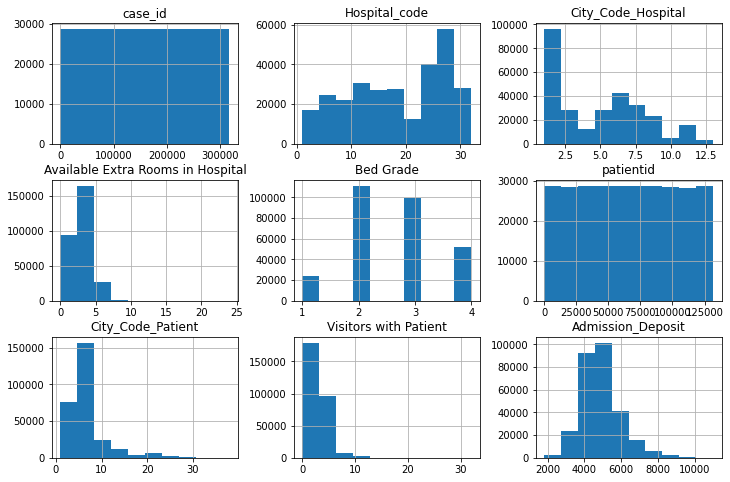

In [265]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

# ignore valid and test sets
train_set.hist(figsize=(12,8))

+ observations:
    + most patients don't have visitors 
    + admission_deposit is mostly normal except for a slight skew right (with the aforementioned 11008 outlier)
    + available extra rooms in hospital seem to be in the 0-5 range
    + most people have 2.0 or 3.0 bed grade

In [267]:
# only for the numeric values
corr = train_set.corr()
corr

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
case_id,1.000000,-0.043588,-0.012630,0.043660,0.013589,-0.003336,0.065413,0.001729,-0.045598
Hospital_code,-0.043588,1.000000,0.129187,-0.059922,-0.013528,0.002852,-0.015622,-0.029024,0.044659
City_Code_Hospital,-0.012630,0.129187,1.000000,-0.045672,-0.049998,0.000164,-0.023647,0.018891,-0.035265
Available Extra Rooms in Hospital,0.043660,-0.059922,-0.045672,1.000000,-0.116359,-0.000582,-0.008342,0.095826,-0.143700
Bed Grade,0.013589,-0.013528,-0.049998,-0.116359,1.000000,0.002808,-0.008774,0.088368,0.074325
patientid,-0.003336,0.002852,0.000164,-0.000582,0.002808,1.000000,0.001282,0.006378,-0.000689
City_Code_Patient,0.065413,-0.015622,-0.023647,-0.008342,-0.008774,0.001282,1.000000,-0.012954,0.025917
Visitors with Patient,0.001729,-0.029024,0.018891,0.095826,0.088368,0.006378,-0.012954,1.000000,-0.149757
Admission_Deposit,-0.045598,0.044659,-0.035265,-0.143700,0.074325,-0.000689,0.025917,-0.149757,1.000000


+ keep in mind, you cannot compare case_id, hospital_code, city_code_hospital, available extra rooms in hospital, bed grade, patientid, city_code_patient, and visitors with patient much with anything else since these are categories represented as numeric columns

<AxesSubplot:>

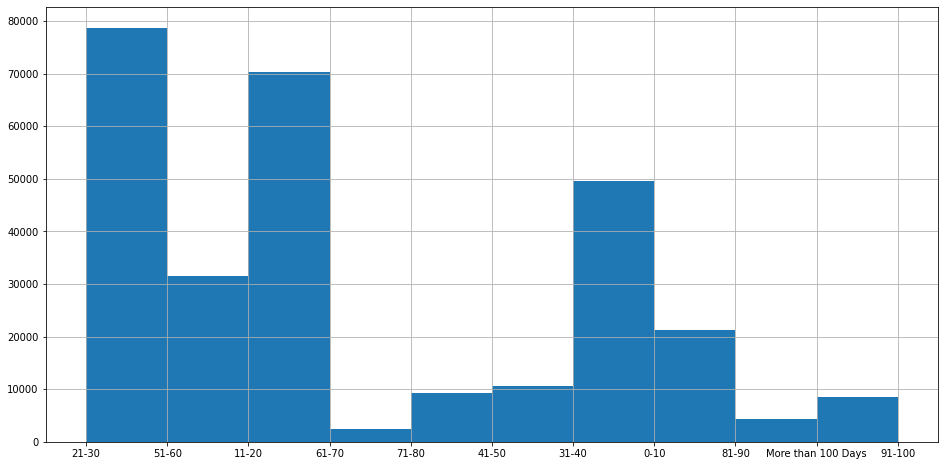

In [269]:
train_set["Stay"].hist(figsize=(16, 8))

In [271]:
train_set["Stay"].value_counts()

21-30                 78742
11-20                 70325
31-40                 49643
51-60                 31516
0-10                  21243
41-50                 10569
71-80                  9229
More than 100 Days     6015
81-90                  4354
91-100                 2488
61-70                  2470
Name: Stay, dtype: int64

+ observations:
    + most people are staying for 11-30 days as expected

## Preprocessing the Data

In [273]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

+ Preprocessing we need to do:
    + "Bed Grade" and "City_Code_Patient" need to be imputed
    + remove "case_id" and "patientid" attribute column
        + reasoning:
            + case_id is simply an index
            + patientid has too many rare occasions (essentially 20349 outliers) to come up with a reasonable feature extraction
    + bucketize (categorize) the following:
        + Hospital_code
            + not uniform
        + Hospital_type_code
            + not uniform
        + City_Code_Hospital
            + not uniform
        + Hospital_region_code
        + Available Extra Rooms in Hospital
            + not uniform
        + Department
            + not uniform
        + Ward_Type
            + not uniform
        + Ward_Facility_Code
        + Bed Grade
        + City_Code_Patient
            + not uniform
        + Type of Admission
        + Severity of Illness
        + Visitors with Patient
            + not uniform
        + Age
            + not uniform
        + Stay
            + not uniform
    + z-score normalization for all numerical columns
    + handle outliers in Admission_Deposit

In [275]:
train_set.isna().sum() # 4053 missing values for city_code_patient and 98 for Bed Grade

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              98
patientid                               0
City_Code_Patient                    4053
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [277]:
# splitting the data into features and labels
X_train = train_set.drop(columns="Stay")
y_train = train_set["Stay"].copy()

X_valid = valid_set.drop(columns="Stay")
y_valid = valid_set["Stay"].copy()

X_test = test_set.drop(columns="Stay")
y_test = test_set["Stay"].copy()

In [279]:
X_train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'],
      dtype='object')

In [281]:
# choose what we want to be fed into the model
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
# custom transformer imputer for categorical columns
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [283]:
selected_columns = [column for column in X_train.columns if column != "case_id" and column != "patientid"]
selected_columns

['Hospital_code',
 'Hospital_type_code',
 'City_Code_Hospital',
 'Hospital_region_code',
 'Available Extra Rooms in Hospital',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Bed Grade',
 'City_Code_Patient',
 'Type of Admission',
 'Severity of Illness',
 'Visitors with Patient',
 'Age',
 'Admission_Deposit']

In [285]:
cat_attribs = ['Hospital_code',
               'Hospital_type_code',
               'City_Code_Hospital',
               'Hospital_region_code',
               'Available Extra Rooms in Hospital',
               'Department',
               'Ward_Type',
               'Ward_Facility_Code',
               'Bed Grade',
               'City_Code_Patient',
               'Type of Admission',
               'Severity of Illness',
               'Visitors with Patient',
               'Age']
num_attribs = ["Admission_Deposit"]

## Pipeline and Model Training

In [287]:
num_pipeline = Pipeline([
    ("scaler", StandardScaler()),
])

cat_pipeline = Pipeline([
    ("most_frequent_imputer", MostFrequentImputer()),
    ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore"))
])

col_transformer = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_attribs),
    ("cat_pipeline", cat_pipeline, cat_attribs),
])



def create_pipeline_and_model(name, model):   
    return Pipeline([
        ("selector", DataFrameSelector(selected_columns)),
        ("col_transformer", col_transformer),
        (name, model), 
    ])

In [289]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier 
# these can be wrapped around your binary clfs or omitted
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

def create_pipeline_and_models(names, models):
    pipeline_and_models = []
    for name, model in zip(names, models):
        pipeline_and_models.append(create_pipeline_and_model(name, model))
    return pipeline_and_models

names = ["LinearSVC", "SGDClassifier", "DecisionTreeClassifier", "RandomForestClassifier", 
         "ExtraTreesClassifier", "KNeighborsClassifier"]
models = [LinearSVC(), 
          SGDClassifier(n_jobs=-1), 
          DecisionTreeClassifier(), 
          RandomForestClassifier(n_jobs=-1), 
          ExtraTreesClassifier(n_jobs=-1), 
          KNeighborsClassifier(n_jobs=-1)]

pipeline_and_models = create_pipeline_and_models(names, models)

In [291]:
for key, value in pipeline_and_models[0][:-1].named_steps.items(): 
    # subscriptable and indexable which is really convenient for an upcoming task
    print(key, value)

selector DataFrameSelector(attribute_names=['Hospital_code', 'Hospital_type_code',
                                   'City_Code_Hospital', 'Hospital_region_code',
                                   'Available Extra Rooms in Hospital',
                                   'Department', 'Ward_Type',
                                   'Ward_Facility_Code', 'Bed Grade',
                                   'City_Code_Patient', 'Type of Admission',
                                   'Severity of Illness',
                                   'Visitors with Patient', 'Age',
                                   'Admission_Deposit'])
col_transformer ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Admission_Deposit']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('most_frequent_imputer',
                                              

In [293]:
# set to True if your models are already trained and saved else set to False
already_trained = True

In [294]:
# only for the training set because it is too large (not for the validation or test sets)
n_instances = 50000
X_train_subset = X_train[:n_instances]
y_train_subset = y_train[:n_instances]

In [295]:
from copy import deepcopy

# every pipeline will be fitted to this
train_valid_test_data_features = train_valid_test_data.drop(columns="Stay")

# training the models
def train_models(names, pipeline_and_models, train_valid_test_data_features, 
                 X_train, y_train, already_trained=True):
    if not already_trained:
        trained_pipeline_and_models = []
        pipelines, models = [], []
        
        # split the pipeline and model
        for pipeline_and_model in pipeline_and_models:
            pipelines.append(deepcopy(pipeline_and_model[:-1]))
            models.append(deepcopy(pipeline_and_model[-1]))
        # pipelines is a list of pipelines and models is a list of just models (not pipelines wrapping models!)
        
        for name, pipeline, model in zip(names, pipelines, models):
            # fit each pipeline to train_valid_test_features
            _ = pipeline.fit(train_valid_test_data_features)
            # transform X_train
            X_train_ready = pipeline.transform(X_train)
            # train the model
            model.fit(X_train_ready, y_train)
            # concatenate pipeline and model together and append to trained_pipeline_and_models
            list_of_components = []
            for component_name, component in pipeline.named_steps.items():
                list_of_components.append((component_name, component))
            list_of_components.append((name, model))
            trained_pipeline_and_models.append(Pipeline(list_of_components))
        
        return trained_pipeline_and_models
    else: 
        pass
    
trained_pipeline_and_models = train_models(names, pipeline_and_models, train_valid_test_data_features, 
                                          X_train_subset, y_train_subset, already_trained=already_trained)

### Checkpointing Trained Models

In [296]:
# extracting just the trained models from the pipelines
def clone_models(names, pipeline_and_models):
    models = []
    for name, pipeline_and_model in zip(names, pipeline_and_models):
        models.append(deepcopy(pipeline_and_model.named_steps[name]))
    return models

In [297]:
import gzip # for compression
import joblib # import pickle also works or from sklearn.externals import joblib

# saving/checkpointing all the models
def save_unrefined_models(names, pipeline_and_models, already_trained=True, 
                          root_dir="D:/models/Final Projects/Classification Task/"):
    if not already_trained:
        if not os.path.isdir(root_dir):
            os.makedirs(root_dir)
        # models = clone_models(names, pipeline_and_models) # optional: if you want to save just your models
        for name, model in zip(names, pipeline_and_models):
            pkl_filename = root_dir + "UNREF_" + name + ".pkl" # UNREF for unrefined
            with gzip.open(pkl_filename + ".gz", 'wb') as file:
                joblib.dump(model, file)
            
save_unrefined_models(names, trained_pipeline_and_models, already_trained=already_trained)

In [298]:
# loading the trained models
def load_unrefined_models(names, root_dir="D:/models/Final Projects/Classification Task/"):
    loaded_models = []
    for name in names:
        pkl_filename = root_dir + "UNREF_" + name + ".pkl"
        # Load from file
        with gzip.open(pkl_filename + ".gz", 'rb') as file:
            pickle_model = joblib.load(file)
            loaded_models.append(pickle_model)
    return loaded_models

# because your model is part of a pipeline that has custom transformers, 
# it can be pickled (but you won't be able to predict or call any functions (as the ColumnTransformer is not fitted))
# if your model was not part of the pipeline, then it can be pickled and
# called on when loaded in

# on a second note, this does seem to work
loaded_models = load_unrefined_models(names)

## Shortlisting Models

In [299]:
# LinearSVC: decision_function
# SGDClassifier: decision_function
# DecisionTreeClassifier: predict_proba
# RandomForestClassifier: predict_proba
# ExtraTreesClassifier: predict_proba
# KNeighborsClassifier: predict_proba

In [300]:
from sklearn.utils import all_estimators

# Finding all models that support predict_proba and decision_function (and both)
# https://stackoverflow.com/questions/30056331/how-to-list-all-scikit-learn-classifiers-that-support-predict-proba
estimators = all_estimators()

# we just need the predict proba list
predict_proba_supported_models, decision_function_supported_models, both_supported_models = [], [], []
for name, class_ in estimators:
    # some models support both so I have 2 conditional statements
    if hasattr(class_, 'predict_proba'):
        predict_proba_supported_models.append(name)
    if hasattr(class_, "decision_function"):
        decision_function_supported_models.append(name)
    if hasattr(class_, "decision_function") and hasattr(class_, 'predict_proba'):
        both_supported_models.append(name)
        
predict_proba_supported_models

['AdaBoostClassifier',
 'BaggingClassifier',
 'BayesianGaussianMixture',
 'BernoulliNB',
 'CalibratedClassifierCV',
 'CategoricalNB',
 'ClassifierChain',
 'ComplementNB',
 'DecisionTreeClassifier',
 'DummyClassifier',
 'ExtraTreeClassifier',
 'ExtraTreesClassifier',
 'GaussianMixture',
 'GaussianNB',
 'GaussianProcessClassifier',
 'GradientBoostingClassifier',
 'GridSearchCV',
 'HistGradientBoostingClassifier',
 'KNeighborsClassifier',
 'LabelPropagation',
 'LabelSpreading',
 'LinearDiscriminantAnalysis',
 'LogisticRegression',
 'LogisticRegressionCV',
 'MLPClassifier',
 'MultiOutputClassifier',
 'MultinomialNB',
 'NuSVC',
 'OneVsRestClassifier',
 'Pipeline',
 'QuadraticDiscriminantAnalysis',
 'RFE',
 'RFECV',
 'RadiusNeighborsClassifier',
 'RandomForestClassifier',
 'RandomizedSearchCV',
 'SGDClassifier',
 'SVC',
 'StackingClassifier',
 'VotingClassifier']

+ string shortcuts for specifying metrics in cross validation:
+ https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

+ multiline vs single line imports
+ https://stackoverflow.com/questions/15011367/python-module-import-single-line-vs-multi-line

In [301]:
from sklearn import metrics

# metrics represented as strings
metrics_as_strings = sorted(metrics.SCORERS.keys())
metrics_as_strings

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [302]:
from sklearn.model_selection import cross_val_score, cross_val_predict
# accuracy_score will be replaced with balanced_accuracy_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
# get_scorer didn't work as I thought it would
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, get_scorer

# these 4 different approaches are divided into 4 different functions 
# in the case where an individual function —isolated from the other functions— needs to be edited

# assessing each trained model
def assess_individual_models(names, pipeline_and_models, X, y, metric):
    individual_scores = {}
    for name, pipeline_and_model in zip(names, pipeline_and_models):
        y_pred = pipeline_and_model.predict(X)
        score = metric(y, y_pred)
        individual_scores[name] = score
    return individual_scores

# assessing each model via cross_val_score
def assess_cross_val_models(names, pipeline_and_models, X, y, metric, cv=5, n_jobs=-1):
    cross_val_scores = {}
    for name, pipeline_and_model in zip(names, pipeline_and_models):
        scores = cross_val_score(pipeline_and_model, X, y, scoring=metric, cv=cv, n_jobs=n_jobs)
        cross_val_scores[name] = scores
    return cross_val_scores

# get each individual model's decision/probability 

# alternatively, I could run the hasattr function within these functions or 
# create a smaller function to be called from these 2 following functions
# however, I simply chose this route because I had the option in doing so

def get_individual_decision_and_proba(names, pipeline_and_models, X, y, predict_proba_supported_models):
    decisions_and_probas = {}
    for name, pipeline_and_model in zip(names, pipeline_and_models):
        if name in predict_proba_supported_models: 
            if name == "SGDClassifier": # SGDClassifier is a special case; needs to be wrapped by a CalibratedClassifierCV
                decision_or_proba = pipeline_and_model.decision_function(X)
            else:
                decision_or_proba = pipeline_and_model.predict_proba(X)
        else: 
            decision_or_proba = pipeline_and_model.decision_function(X)
        decisions_and_probas[name] = decision_or_proba
    return decisions_and_probas
        
# get each model's decision/probability via cross_val_predict
def get_cross_val_decision_and_proba(names, pipeline_and_models, X, y, predict_proba_supported_models, cv=5, n_jobs=-1):
    cross_val_decisions_or_probas = {}
    for name, pipeline_and_model in zip(names, pipeline_and_models):
        if name in predict_proba_supported_models:  
            method = "predict_proba"
            if name == "SGDClassifier":
                method = "decision_function"
        else: 
            method = "decision_function"
        scores = cross_val_predict(pipeline_and_model, X, y, cv=cv, n_jobs=n_jobs, method=method)
        cross_val_decisions_or_probas[name] = scores
    return cross_val_decisions_or_probas

# combine everything together through a wrapper function
def pretest_evaluate(names, pipeline_and_models, X, y, metrics, cross_val_metrics, 
                     predict_proba_supported_models, cv=5, n_jobs=-1, already_trained=True):
    if not already_trained:
        # this will be a dictionary: 
            # 1 key for each metric
                # each key has a dictionary of n keys (where n is the number of models in pipeline_and_models)
                    # each key here will have 1 value associated with it: the score for that model, for that specific metric
        all_metric_scores = {}
        # metrics = [get_scorer(metric_as_string) for metric_as_string in cross_val_metrics] doesn't work
        for metric_name, metric in zip(cross_val_metrics, metrics):
            metric_scores = assess_individual_models(names, pipeline_and_models, X, y, metric)
            all_metric_scores[metric_name] = metric_scores

        # this will be a dictionary:
            # 1 key for each metric
                # each key has a dictionary of n keys (where n is the number of models in pipeline_and_models)
                    # # each key here will have cv values associated with it: the score for that model, for that specific metric
        all_cross_val_metric_scores = {}
        for metric in cross_val_metrics:
            cross_val_metric_scores = assess_cross_val_models(names, pipeline_and_models, X, y, metric, cv=cv, n_jobs=n_jobs)
            all_cross_val_metric_scores[metric] = cross_val_metric_scores

        # this will be a dictionary:
            # 1 key for each model
                # each key will correspond to a 2D matrix holding the decisions or predict_probas
                    # all 2D matrices will be of shape: (n_samples, n_classes)
        decisions_and_probas = get_individual_decision_and_proba(names, pipeline_and_models, X, y, 
                                                                 predict_proba_supported_models)

        # this will be a dictionary:
            # 1 key for each model
                # each key will correspond to a 2D matrix holding the decisions or predict_probas
                    # all 2D matrices will be of shape: (n_samples, n_classes)
        cross_val_decisions_or_probas = get_cross_val_decision_and_proba(names, pipeline_and_models, X, y, 
                                                                         predict_proba_supported_models, cv=cv, n_jobs=n_jobs)

        return all_metric_scores, all_cross_val_metric_scores, decisions_and_probas, cross_val_decisions_or_probas
    else:
        return _, _, _, _

In [303]:
from functools import partial

f1_weighted = partial(f1_score, average="weighted")
precision_weighted = partial(precision_score, average="weighted")
recall_weighted = partial(recall_score, average="weighted")

# these 2 lists have to be in the same order
cross_val_metrics = [
    "accuracy",
    "balanced_accuracy", 
    "f1_weighted", 
    "precision_weighted", 
    "recall_weighted"
]
metrics = [
    accuracy_score,
    balanced_accuracy_score,
    f1_weighted,
    precision_weighted,
    recall_weighted,
]



# calling pretest_evaluate
all_metric_scores, all_cross_val_metric_scores, decisions_and_probas, cross_val_decisions_or_probas = pretest_evaluate(names, 
                                                                                                                       loaded_models, 
                                                                                                                       X_train_subset[:20000], 
                                                                                                                       y_train_subset[:20000], 
                                                                                                                       metrics,
                                                                                                                       cross_val_metrics, 
                                                                                                                       predict_proba_supported_models, 
                                                                                                                       cv=5, 
                                                                                                                       n_jobs=-1,
                                                                                                                       already_trained=already_trained)

+ UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
+ https://stackoverflow.com/questions/54150147/classification-report-precision-and-f-score-are-ill-defined

+ AttributeError: probability estimates are not available for loss='hinge'
+ https://stackoverflow.com/questions/39200265/attributeerror-probability-estimates-are-not-available-for-loss-hinge

### Checkpointing Pre-Test Evaluations

In [304]:
def save_pretest_evaluations(all_metric_scores, all_cross_val_metric_scores, 
                             decisions_and_probas, cross_val_decisions_or_probas,
                             already_trained=True,
                             root_dir="D:/models/Final Projects/Classification Task/"):
    names = ["all_metric_scores", "all_cross_val_metric_scores", 
                             "decisions_and_probas", "cross_val_decisions_or_probas"]
    scores = [all_metric_scores, all_cross_val_metric_scores, 
                             decisions_and_probas, cross_val_decisions_or_probas]
    if not already_trained:
        if not os.path.isdir(root_dir):
            os.makedirs(root_dir)
        for name, dictionary in zip(names, scores):       
            pkl_filename = root_dir + "pretest_eval_" + name + ".pkl"
            with gzip.open(pkl_filename + ".gz", 'wb') as file:
                        joblib.dump(dictionary, file)
    return names
    
pretest_evaluation_names = save_pretest_evaluations(all_metric_scores, all_cross_val_metric_scores, 
                                                    decisions_and_probas, cross_val_decisions_or_probas,
                                                    already_trained=already_trained)

In [305]:
def load_pretest_evaluations(names, root_dir="D:/models/Final Projects/Classification Task/"):
    all_scores = []
    for name in names: 
        pkl_filename = root_dir + "pretest_eval_" + name + ".pkl"
        with gzip.open(pkl_filename + ".gz", 'rb') as file:
            dictionary_score = joblib.load(file)
            all_scores.append(dictionary_score)
    return all_scores

all_metric_scores, all_cross_val_metric_scores, decisions_and_probas, cross_val_decisions_or_probas = load_pretest_evaluations(pretest_evaluation_names)

### Analyzing Evaluations

+ calculating accuracy as an extra metric

In [306]:
# accuracy score on the training subset we used
already_evaluated = True
if not already_evaluated:
    for model in loaded_models:
        print(accuracy_score(y_train_subset, model.predict(X_train_subset)))
        
# 0.3944
# 0.33632
# 0.99996
# 0.99996
# 0.99996
# 0.51212

In [307]:
# accuracy score on the validation set
if not already_evaluated:
    for model in loaded_models:
        print(accuracy_score(y_valid, model.predict(X_valid)))
        
# 0.38960767072813296
# 0.33375204120085417
# 0.2925930578235565
# 0.37411547962986225
# 0.35238454130553115
# 0.3200184231461709

In [308]:
# accuracy score on the entire training set
if not already_evaluated:
    for model in loaded_models:
        print(accuracy_score(y_train, model.predict(X_train)))
    
# 0.39003258965644777
# 0.33131537994514887
# 0.4187038109660356
# 0.4826130344668765
# 0.46631471698639887
# 0.34945253564275597

+ looks like our accuracy metric falls within the rough range of: 30-40%

In [309]:
# display metric scores as a table
def display_scores(all_metric_scores, all_cross_val_metric_scores):
    
    # the following is for all_cross_val_metric_scores
    # mean and std are calculated here
    all_cross_val_metric_scores_mean, all_cross_val_metric_scores_std = {}, {}
    for key1, value1 in all_cross_val_metric_scores.items():
        metric_scores_mean, metric_scores_std = {}, {}
        for key2, value2 in value1.items():
            metric_scores_mean[key2] = value2.mean()
            metric_scores_std[key2] = value2.std()
        all_cross_val_metric_scores_mean[key1] = metric_scores_mean
        all_cross_val_metric_scores_std[key1] = metric_scores_std
    
    # the following is for all_metric_scores
    count1, count2, count3 = 1, 1, 1
    first_key1, first_key2, first_key3 = next(iter(all_metric_scores)), next(iter(all_cross_val_metric_scores_mean)), next(iter(all_cross_val_metric_scores_std))
    all_metric_scores_df = pd.DataFrame(all_metric_scores[first_key1], index=[first_key1])
    all_cross_val_metric_scores_df_mean = pd.DataFrame(all_cross_val_metric_scores_mean[first_key2], index=[first_key2])
    all_cross_val_metric_scores_df_std = pd.DataFrame(all_cross_val_metric_scores_std[first_key3], index=[first_key3])
    for key1, key2, key3 in zip(all_metric_scores.keys(), all_cross_val_metric_scores_mean.keys(), all_cross_val_metric_scores_std.keys()):
        if count1 == 1 and count2 == 1 and count3 == 1: 
            count1 += 1; count2 += 1; count3 += 1; continue
        df1 = pd.DataFrame(all_metric_scores[key1], index=[key1])
        all_metric_scores_df = pd.concat([all_metric_scores_df, df1], axis=0)
        
        df2 = pd.DataFrame(all_cross_val_metric_scores_mean[key2], index=[key2])
        all_cross_val_metric_scores_df_mean = pd.concat([all_cross_val_metric_scores_df_mean, df2], axis=0)
        
        df3 = pd.DataFrame(all_cross_val_metric_scores_std[key3], index=[key3])
        all_cross_val_metric_scores_df_std = pd.concat([all_cross_val_metric_scores_df_std, df3], axis=0)

    
    return all_metric_scores_df, all_cross_val_metric_scores_df_mean, all_cross_val_metric_scores_df_std

all_metric_scores_df, all_cross_val_metric_scores_df_mean, all_cross_val_metric_scores_df_std = display_scores(
    all_metric_scores, all_cross_val_metric_scores
)

In [310]:
all_metric_scores_df # individual scores

,LinearSVC,SGDClassifier,DecisionTreeClassifier,RandomForestClassifier,ExtraTreesClassifier,KNeighborsClassifier
accuracy,0.392950,0.334400,0.999900,0.999900,0.999900,0.510000
balanced_accuracy,0.196275,0.194598,0.999943,0.999943,0.999943,0.288359
f1_weighted,0.328976,0.310335,0.999900,0.999900,0.999900,0.486214
precision_weighted,0.361490,0.317879,0.999900,0.999900,0.999900,0.514514
recall_weighted,0.392950,0.334400,0.999900,0.999900,0.999900,0.510000


In [311]:
all_cross_val_metric_scores_df_mean # mean of cross val scores

,LinearSVC,SGDClassifier,DecisionTreeClassifier,RandomForestClassifier,ExtraTreesClassifier,KNeighborsClassifier
accuracy,0.383500,0.321850,0.289700,0.372700,0.352700,0.304850
balanced_accuracy,0.190938,0.186794,0.190490,0.198215,0.200896,0.141280
f1_weighted,0.319165,0.277342,0.289688,0.345109,0.329362,0.279545
precision_weighted,0.331155,0.296292,0.288596,0.337012,0.322040,0.280187
recall_weighted,0.383500,0.317450,0.292750,0.370250,0.350750,0.304850


In [312]:
all_cross_val_metric_scores_df_std # std of cross val scores

,LinearSVC,SGDClassifier,DecisionTreeClassifier,RandomForestClassifier,ExtraTreesClassifier,KNeighborsClassifier
accuracy,0.007192,0.009109,0.012156,0.009583,0.006692,0.005447
balanced_accuracy,0.003930,0.008631,0.009426,0.003148,0.010320,0.003319
f1_weighted,0.005526,0.019107,0.010998,0.002963,0.003743,0.004545
precision_weighted,0.010442,0.010859,0.008936,0.008614,0.004344,0.004797
recall_weighted,0.007192,0.021190,0.011210,0.004599,0.005889,0.005447


In [313]:
# calculating the ROC AUC scores

# note: the PRvT, PR, and ROC curves are all restricted to binary classification

# note: can only be calculated for predict_proba supported models
def calculate_roc_auc_scores(decisions_and_probas, y, predict_proba_supported_models, multi_class="ovr"):
    roc_auc_scores = {}
    for key, values in decisions_and_probas.items():
        if key in predict_proba_supported_models and key != "SGDClassifier":
            score = roc_auc_score(y, values, multi_class=multi_class)
            roc_auc_scores[key] = score
    return roc_auc_scores

roc_auc_scores = calculate_roc_auc_scores(decisions_and_probas, y_train_subset[:20000], predict_proba_supported_models)
roc_auc_scores

{'DecisionTreeClassifier': 0.9999999980484481,
 'RandomForestClassifier': 0.9999997260364325,
 'ExtraTreesClassifier': 0.9999999980484481,
 'KNeighborsClassifier': 0.9262439744529188}

In [314]:
cross_val_roc_auc_scores = calculate_roc_auc_scores(cross_val_decisions_or_probas, y_train_subset[:20000], 
                                                    predict_proba_supported_models)
cross_val_roc_auc_scores

{'DecisionTreeClassifier': 0.5574933226218722,
 'RandomForestClassifier': 0.737201368581852,
 'ExtraTreesClassifier': 0.7202995856452263,
 'KNeighborsClassifier': 0.5872816159957392}

+ RandomForestClassifier and ExtraTreesClassifier are both the strongest competitors along with LinearSVC 

### Shortlist Models

In [315]:
def shortlist_models(models, names, chosen_models):
    shortlisted_models = []
    for model in chosen_models:
        idx = names.index(model)
        shortlisted_models.append(models[idx])
    return shortlisted_models

chosen_models = ['LinearSVC', "RandomForestClassifier", "ExtraTreesClassifier"]
shortlisted_models = shortlist_models(loaded_models, names, chosen_models)
shortlisted_models

[Pipeline(steps=[('selector',
                  DataFrameSelector(attribute_names=['Hospital_code',
                                                     'Hospital_type_code',
                                                     'City_Code_Hospital',
                                                     'Hospital_region_code',
                                                     'Available Extra Rooms in '
                                                     'Hospital',
                                                     'Department', 'Ward_Type',
                                                     'Ward_Facility_Code',
                                                     'Bed Grade',
                                                     'City_Code_Patient',
                                                     'Type of Admission',
                                                     'Severity of Illness',
                                                     'Visitors with Patient',
    

## Error Analysis

+ error analysis can be performed before shortlisting, however, it would be somewhat trivial to analyze errors for models that are already outclassed by others

In [316]:
from sklearn.metrics import confusion_matrix

# using cross val predict predictions
def make_predictions(names, models, X, y, cv=5, n_jobs=-1):
    predictions_dict = {}
    for name, model in zip(names, models):
        predictions = cross_val_predict(model, X, y, cv=cv, n_jobs=n_jobs, method="predict")
        predictions_dict[name] = predictions
    return predictions_dict
        
predictions_dict = make_predictions(chosen_models, shortlisted_models, X_train_subset[:20000], y_train_subset[:20000])

In [317]:
predictions_dict

{'LinearSVC': array(['21-30', '21-30', '11-20', ..., '21-30', '11-20', '21-30'],
       dtype=object),
 'RandomForestClassifier': array(['21-30', '21-30', '21-30', ..., '31-40', '21-30', '21-30'],
       dtype=object),
 'ExtraTreesClassifier': array(['21-30', '21-30', '21-30', ..., '31-40', '41-50', '11-20'],
       dtype=object)}

In [318]:
labels = train_data["Stay"].unique()
labels

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [319]:
# compute confusion matrices
def compute_conf_mx(y_true, y_pred_dict, labels):
    conf_mx_dict = {}
    for name, prediction in y_pred_dict.items():
        conf_mx = confusion_matrix(y_true, prediction, labels=labels)
        conf_mx_dict[name] = conf_mx
    return conf_mx_dict

conf_mx_dict = compute_conf_mx(y_train_subset[:20000], predictions_dict, labels)

In [320]:
# plot confusion matrices
def plot_conf_mx(conf_mx_dict, key, cmap=plt.cm.Spectral, normalize=True):
    conf_mx = conf_mx_dict[key]
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    normalized_conf_mx = conf_mx / row_sums
    np.fill_diagonal(normalized_conf_mx, 0)
    plt.matshow(normalized_conf_mx, cmap=cmap)
    plt.xlabel("Predicted")
    plt.ylabel("Reality")
    plt.colorbar()
    plt.grid(False)
    plt.show()

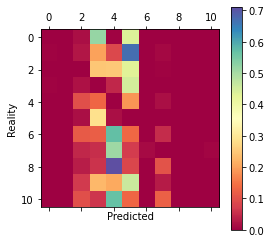

In [321]:
plot_conf_mx(conf_mx_dict, "LinearSVC")

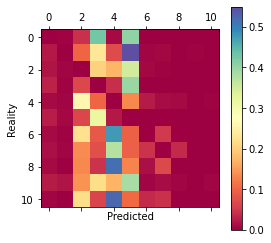

In [322]:
plot_conf_mx(conf_mx_dict, "RandomForestClassifier")

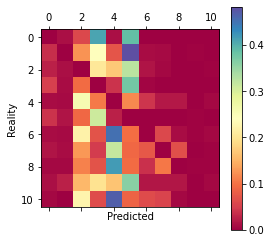

In [323]:
plot_conf_mx(conf_mx_dict, "ExtraTreesClassifier")

In [324]:
# converted to dictionary just for convenient viewing
labels_dict = {idx: label for idx, label in enumerate(labels)}
labels_dict

{0: '0-10',
 1: '41-50',
 2: '31-40',
 3: '11-20',
 4: '51-60',
 5: '21-30',
 6: '71-80',
 7: 'More than 100 Days',
 8: '81-90',
 9: '61-70',
 10: '91-100'}

In [325]:
# looking at the distribution
train_data["Stay"].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

+ Ways we can improve:
    + try different stratification methods to give more weights to diff features (i.e. Age, etc)
    + train on more data
    + data augmentations (keep this at a limit)
    + Dimensionality Reduction (DR)
    + Denoise the dataset (remove irrelevant features, and be more critical on removing certain features)

## Fine Tuning

In [326]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [327]:
# we will fine tune each individual pipeline separately
shortlisted_models

[Pipeline(steps=[('selector',
                  DataFrameSelector(attribute_names=['Hospital_code',
                                                     'Hospital_type_code',
                                                     'City_Code_Hospital',
                                                     'Hospital_region_code',
                                                     'Available Extra Rooms in '
                                                     'Hospital',
                                                     'Department', 'Ward_Type',
                                                     'Ward_Facility_Code',
                                                     'Bed Grade',
                                                     'City_Code_Patient',
                                                     'Type of Admission',
                                                     'Severity of Illness',
                                                     'Visitors with Patient',
    

In [328]:
# to save fine-tuning results
def save_finetuning(finetuning_cv, cv_type, name_of_model, root_dir="D:/models/Final Projects/Classification Task/", 
                    already_finetuned=True):
    if not already_finetuned:
        finetuning_dict = {}
        finetuning_dict["cv_results_"] = finetuning_cv.cv_results_
        finetuning_dict["best_estimator_"] = finetuning_cv.best_estimator_
        finetuning_dict["best_score_"] = finetuning_cv.best_score_
        finetuning_dict["best_params_"] = finetuning_cv.best_params_
        pkl_filename = root_dir + "finetune_results_" + cv_type + "_" + name_of_model + ".pkl"
        with gzip.open(pkl_filename + ".gz", "wb") as file:
            joblib.dump(finetuning_dict, file)

In [329]:
# to load fine-tuning results
def load_finetuning(cv_type, name_of_model, root_dir="D:/models/Final Projects/Classification Task/"):
    pkl_filename = root_dir + "finetune_results_" + cv_type + "_" + name_of_model + ".pkl"
    with gzip.open(pkl_filename + ".gz", "rb") as file:
        cv_results = joblib.load(file)
    return cv_results

In [330]:
# only 1 round of fine-tuning to narrow down our best model(s)

# fine-tuning the LinearSVC
linearsvc_param_grid = {"LinearSVC__tol": [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
              "LinearSVC__C": [0.1, 0.5, 1.0, 10],
              "LinearSVC__class_weight": [None, "balanced"]}

# for speed
shortlisted_models[0].named_steps["LinearSVC"].dual = False

# we will use accuracy for all fine-tuning and a cv=5
linearsvc_grid_cv = GridSearchCV(shortlisted_models[0], linearsvc_param_grid, scoring="accuracy", cv=5, 
                                 verbose=2, n_jobs=-1)
linearsvc_rnd_cv = RandomizedSearchCV(shortlisted_models[0], linearsvc_param_grid, scoring="accuracy", cv=5, 
                                      verbose=2, n_jobs=-1)

In [331]:
# our light switch
already_finetuned = True

In [332]:
if not already_finetuned:
    linearsvc_grid_cv.fit(X_train_subset, y_train_subset)

In [333]:
# save the results of finetuning for our LinearSVC model
save_finetuning(linearsvc_grid_cv, "grid", "LinearSVC", already_finetuned=already_finetuned)

In [334]:
# load the results of finetuning for our LinearSVC model
linearsvc_gridcv_results = load_finetuning("grid", "LinearSVC")

# this is a dictionary:
# 4 keys:
    # cv_results_
    # best_estimator_
    # best_score_
    # best_params_

linearsvc_gridcv_results

{'cv_results_': {'mean_fit_time': array([ 40.88827562,  33.94135556,  26.48493834,  17.53175902,
           9.02059326,  43.34027181,  34.21760669,  25.56885505,
          18.19408565,  10.97703586,  60.24782953,  47.52997012,
          35.36339159,  24.87391739,  10.94214659,  67.54761748,
          52.08742204,  38.32767153,  23.01990981,  11.51291537,
          64.83933125,  50.36001682,  35.87433119,  23.31675439,
           9.39661427,  71.49429169,  55.08000369,  40.49923768,
          26.12549443,  12.87743216, 136.47952294,  94.59496818,
          53.575776  ,  29.26733866,  10.09244814, 146.67005973,
         107.82929606,  67.82892623,  29.40747266,  12.67825513]),
  'std_fit_time': array([ 0.92587124,  0.94159686,  0.51385146,  0.83964222,  0.26318765,
          0.5981877 ,  0.74447319,  0.73715017,  0.49376509,  0.65660862,
          1.16950518,  2.115914  ,  1.93475775,  0.66468555,  0.44887617,
          3.61014435,  3.11219267,  2.33673027,  2.0648216 ,  0.52865968,
    

In [335]:
linearsvc_gridcv_results["best_score_"], linearsvc_gridcv_results["best_params_"]

(0.39038000000000006,
 {'LinearSVC__C': 0.1,
  'LinearSVC__class_weight': None,
  'LinearSVC__tol': 0.01})

In [336]:
if not already_finetuned:
    linearsvc_rnd_cv.fit(X_train_subset, y_train_subset)

In [337]:
# save the results of finetuning for our LinearSVC model
save_finetuning(linearsvc_rnd_cv, "rnd", "LinearSVC", already_finetuned=already_finetuned)

In [338]:
# load the results of finetuning for our LinearSVC model
linearsvc_rndcv_results = load_finetuning("rnd", "LinearSVC")

linearsvc_rndcv_results

{'cv_results_': {'mean_fit_time': array([36.87730231,  9.15158515, 17.13755646,  9.99731894, 27.40074821,
         32.75142455, 23.7147325 , 89.7294909 , 40.62269902, 22.15308657]),
  'std_fit_time': array([1.03497534, 0.22269959, 0.87495794, 0.64348656, 1.15161108,
         0.97214309, 0.97241271, 6.32808711, 2.42514601, 3.4809664 ]),
  'mean_score_time': array([0.10692964, 0.08940077, 0.10029011, 0.09813223, 0.10924029,
         0.09928131, 0.11166306, 0.09038801, 0.1115118 , 0.07180004]),
  'std_score_time': array([0.0223501 , 0.00463043, 0.01244664, 0.01454238, 0.02168865,
         0.01166684, 0.0150202 , 0.01140525, 0.01617238, 0.02396185]),
  'param_LinearSVC__tol': masked_array(data=[0.0001, 0.01, 0.001, 0.01, 0.001, 1e-05, 0.001, 1e-05,
                     0.0001, 0.001],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'param_LinearSVC__class_weight': masked

In [339]:
linearsvc_rndcv_results["best_score_"], linearsvc_rndcv_results["best_params_"]

(0.39028,
 {'LinearSVC__tol': 1e-05,
  'LinearSVC__class_weight': None,
  'LinearSVC__C': 10})

In [340]:
# fine-tuning the RandomForestClassifier

rnd_forest_param_grid = {"RandomForestClassifier__n_estimators": [50, 100, 200],
                         "RandomForestClassifier__criterion": ["gini", "entropy"],
                         "RandomForestClassifier__bootstrap": [True, False],
                         "RandomForestClassifier__n_jobs": [-1],}

rnd_forest_grid_cv = GridSearchCV(shortlisted_models[1], rnd_forest_param_grid, scoring="accuracy", cv=5, 
                                 verbose=2, n_jobs=-1)
rnd_forest_rnd_cv = RandomizedSearchCV(shortlisted_models[1], rnd_forest_param_grid, scoring="accuracy", cv=5, 
                                      verbose=2, n_jobs=-1)

In [341]:
if not already_finetuned:
    rnd_forest_grid_cv.fit(X_train_subset, y_train_subset)

In [342]:
save_finetuning(rnd_forest_grid_cv, "grid", "RandomForestClassifier", already_finetuned=already_finetuned)

In [343]:
rnd_forest_gridcv_results = load_finetuning("grid", "RandomForestClassifier")

rnd_forest_gridcv_results

{'cv_results_': {'mean_fit_time': array([ 62.41088223, 113.21358724, 220.30602565,  71.86435289,
         123.74584494, 242.77289605, 106.96537738, 194.87761159,
         382.62811923, 117.10965352, 208.23055205, 268.05204906]),
  'std_fit_time': array([ 1.54214038,  2.99033577,  1.98092155,  2.81549534,  1.82232016,
          0.81256771,  3.0698109 ,  1.30361444,  1.5503263 ,  1.58666413,
          0.9455669 , 42.80357296]),
  'mean_score_time': array([3.45575213, 5.72686715, 5.91826487, 5.38145323, 4.67454486,
         4.90066147, 4.07036896, 5.053933  , 4.78235178, 4.18367615,
         4.11919169, 1.83642569]),
  'std_score_time': array([0.10184078, 0.27807547, 0.92004572, 0.34990481, 0.47290093,
         0.39322496, 0.25982254, 0.68811616, 1.16292277, 1.14754959,
         0.60345873, 1.24065661]),
  'param_RandomForestClassifier__bootstrap': masked_array(data=[True, True, True, True, True, True, False, False,
                     False, False, False, False],
               mask=[Fa

In [344]:
rnd_forest_gridcv_results["best_score_"], rnd_forest_gridcv_results["best_params_"]

(0.37826,
 {'RandomForestClassifier__bootstrap': True,
  'RandomForestClassifier__criterion': 'gini',
  'RandomForestClassifier__n_estimators': 200,
  'RandomForestClassifier__n_jobs': -1})

In [345]:
if not already_finetuned:
    rnd_forest_rnd_cv.fit(X_train_subset, y_train_subset)

In [346]:
save_finetuning(rnd_forest_rnd_cv, "rnd", "RandomForestClassifier", already_finetuned=already_finetuned)

In [347]:
rnd_forest_rndcv_results = load_finetuning("rnd", "RandomForestClassifier")

rnd_forest_rndcv_results

{'cv_results_': {'mean_fit_time': array([167.97173262,  72.52686691,  88.67222676, 308.90141273,
         117.69388971, 102.74995389, 115.26837974,  59.05285082,
         196.70236621, 190.48903208]),
  'std_fit_time': array([ 1.58344361,  1.16760426,  3.19913605, 32.07467476, 23.90994682,
         13.575437  ,  8.76065325,  3.09340423,  2.02855974, 44.60695222]),
  'mean_score_time': array([2.68381567, 5.74735241, 5.49169679, 0.        , 4.4670918 ,
         4.38585792, 6.29517732, 7.30995626, 7.86397738, 2.35360937]),
  'std_score_time': array([0.36003493, 0.56881489, 1.64526658, 0.        , 3.67903224,
         2.21628719, 1.80994352, 0.61957581, 0.70628052, 1.74108794]),
  'param_RandomForestClassifier__n_jobs': masked_array(data=[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'param_RandomForestClassifier__n_estimators':

In [348]:
rnd_forest_rndcv_results["best_score_"], rnd_forest_rndcv_results["best_params_"]

(0.37632000000000004,
 {'RandomForestClassifier__n_jobs': -1,
  'RandomForestClassifier__n_estimators': 100,
  'RandomForestClassifier__criterion': 'gini',
  'RandomForestClassifier__bootstrap': True})

In [349]:
# fine-tuning the ExtraTreesClassifier

extrees_param_grid = {"ExtraTreesClassifier__n_estimators": [50, 100, 200],
                      "ExtraTreesClassifier__criterion": ["gini", "entropy"],
                      "ExtraTreesClassifier__bootstrap": [True, False],
                      "ExtraTreesClassifier__n_jobs": [-1],}

extrees_grid_cv = GridSearchCV(shortlisted_models[2], extrees_param_grid, scoring="accuracy", cv=5, 
                                 verbose=2, n_jobs=-1)
extrees_rnd_cv = RandomizedSearchCV(shortlisted_models[2], extrees_param_grid, scoring="accuracy", cv=5, 
                                      verbose=2, n_jobs=-1)

In [350]:
if not already_finetuned:
    extrees_grid_cv.fit(X_train_subset, y_train_subset)

In [351]:
save_finetuning(extrees_grid_cv, "grid", "ExtraTreesClassifier", already_finetuned=already_finetuned)

In [352]:
extrees_gridcv_results = load_finetuning("grid", "ExtraTreesClassifier")

extrees_gridcv_results

{'cv_results_': {'mean_fit_time': array([ 58.46599889, 107.96428342, 218.73975902,  69.90635643,
         123.69112968, 243.38776259, 106.32155876, 195.75096869,
         319.58040533, 111.115593  , 201.26552162, 260.28806787]),
  'std_fit_time': array([ 1.13640282,  3.87832512,  2.72931872,  1.8207274 ,  0.91519923,
          0.44096684,  3.70775319,  3.0473858 , 53.94756547,  3.97469964,
          6.55037264, 40.03878438]),
  'mean_score_time': array([3.24099336, 4.09455986, 5.03631825, 4.2394249 , 4.70796809,
         6.18426681, 4.20577292, 6.96894722, 2.57371378, 6.08085837,
         4.2018332 , 1.58677773]),
  'std_score_time': array([0.12356089, 0.1388841 , 0.1797609 , 0.41817416, 0.40276131,
         1.10544662, 0.08226676, 1.13154942, 3.39982996, 0.42269254,
         0.74772307, 1.49019856]),
  'param_ExtraTreesClassifier__bootstrap': masked_array(data=[True, True, True, True, True, True, False, False,
                     False, False, False, False],
               mask=[Fals

In [353]:
extrees_gridcv_results["best_score_"], extrees_gridcv_results["best_params_"], 

(0.37074,
 {'ExtraTreesClassifier__bootstrap': True,
  'ExtraTreesClassifier__criterion': 'gini',
  'ExtraTreesClassifier__n_estimators': 200,
  'ExtraTreesClassifier__n_jobs': -1})

In [354]:
if not already_finetuned: # RunTime Error : can't start new thread
    extrees_rnd_cv.fit(X_train_subset, y_train_subset)

In [355]:
from sklearn.base import clone

# training a clone of our best estimator with the fine-tuned hyperparams
linear_svc_tuned = clone(linearsvc_gridcv_results["best_estimator_"])
linear_svc_tuned.named_steps["LinearSVC"].C = 0.1
linear_svc_tuned.named_steps["LinearSVC"].tol = 0.01
linear_svc_tuned.named_steps["LinearSVC"].dual = False

In [356]:
linear_svc_tuned

Pipeline(steps=[('selector',
                 DataFrameSelector(attribute_names=['Hospital_code',
                                                    'Hospital_type_code',
                                                    'City_Code_Hospital',
                                                    'Hospital_region_code',
                                                    'Available Extra Rooms in '
                                                    'Hospital',
                                                    'Department', 'Ward_Type',
                                                    'Ward_Facility_Code',
                                                    'Bed Grade',
                                                    'City_Code_Patient',
                                                    'Type of Admission',
                                                    'Severity of Illness',
                                                    'Visitors with Patient',
                  

In [357]:
# getting feature importances from a model (2nd best performing) that has the feature_importances_ attrib
feature_importances = rnd_forest_gridcv_results["best_estimator_"].named_steps["RandomForestClassifier"].feature_importances_
feature_importances

array([1.61116909e-01, 1.42831340e-03, 1.78898396e-03, 2.63361868e-03,
       7.92234748e-04, 2.35803275e-03, 4.83997106e-03, 8.03735915e-04,
       1.45196123e-03, 2.46650699e-03, 2.77407773e-03, 3.18158143e-03,
       2.22217154e-03, 1.34796847e-03, 4.14946779e-03, 2.62814331e-03,
       1.93804702e-03, 1.66653334e-03, 1.02825079e-03, 2.25781418e-03,
       6.73331390e-04, 2.69033155e-03, 1.22762176e-03, 5.36141642e-03,
       2.69711034e-03, 3.06268548e-03, 3.95356521e-03, 2.01643021e-03,
       1.83933500e-03, 2.90833899e-03, 2.24679231e-03, 2.19289862e-03,
       1.35686157e-03, 6.77048505e-03, 3.32670581e-03, 3.78430715e-03,
       3.58950741e-03, 3.32485410e-03, 1.32522050e-03, 1.23086888e-03,
       3.81912413e-03, 2.23800158e-03, 3.08222659e-03, 2.92144244e-03,
       3.70877218e-03, 4.35933777e-03, 2.12735769e-03, 2.76355573e-03,
       1.45193475e-03, 1.81073751e-03, 1.02152252e-03, 4.41001012e-03,
       3.79279211e-03, 3.74270586e-03, 2.00583833e-05, 4.24917647e-03,
      

In [358]:
feature_importances.shape

(168,)

In [359]:
# access the OHE in our pipeline
i = rnd_forest_gridcv_results["best_estimator_"].named_steps["col_transformer"]
h = i.named_transformers_["cat_pipeline"]
h

Pipeline(steps=[('most_frequent_imputer', MostFrequentImputer()),
                ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))])

In [360]:
# note: remember while the feature_importances has 168, this has 167 (excluding Admission_Deposit)

# note: when we trained our first batch of models, the pipeline was severed from the model such that it could
# fit the entire selection of features 

# count the number of categories created by the OHE 
counter = 0
for y in h.named_steps["one_hot_encoder"].categories_:
    for x in y:
        counter += 1
print(counter) 

167


In [361]:
# note: even though our original pipelines were fitted to include all features (a total of 174),
# the fine-tuning methods create copies of our pipeline_model (that are untrained) 
# and since we fitted to a subset of the entire dataset, the subset was only able to capture
# 168 features out of the total 174

rnd_forest_gridcv_results["best_estimator_"][:-1].transform(train_valid_test_data_features).shape

(318438, 168)

In [362]:
# first, lets print the categories
for i in h.named_steps["one_hot_encoder"].categories_:
    print(i)
    print("")

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]

['a' 'b' 'c' 'd' 'e' 'f' 'g']

[ 1  2  3  4  5  6  7  9 10 11 13]

['X' 'Y' 'Z']

[ 0  1  2  3  4  5  6  7  8  9 10 11 13 20]

['TB & Chest disease' 'anesthesia' 'gynecology' 'radiotherapy' 'surgery']

['P' 'Q' 'R' 'S' 'T']

['A' 'B' 'C' 'D' 'E' 'F']

[1. 2. 3. 4.]

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 18. 19.
 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.
 38.]

['Emergency' 'Trauma' 'Urgent']

['Extreme' 'Minor' 'Moderate']

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 30 32]

['0-10' '11-20' '21-30' '31-40' '41-50' '51-60' '61-70' '71-80' '81-90'
 '91-100']



In [363]:
unique_value_counts

{'case_id': 318438,
 'Hospital_code': 32,
 'Hospital_type_code': 7,
 'City_Code_Hospital': 11,
 'Hospital_region_code': 3,
 'Available Extra Rooms in Hospital': 18,
 'Department': 5,
 'Ward_Type': 6,
 'Ward_Facility_Code': 6,
 'Bed Grade': 4,
 'patientid': 92017,
 'City_Code_Patient': 37,
 'Type of Admission': 3,
 'Severity of Illness': 3,
 'Visitors with Patient': 28,
 'Age': 10,
 'Admission_Deposit': 7300,
 'Stay': 11}

In [364]:
# if we wanted to, we could deepcopy our original pipeline (just 1 of them, we don't need all of them since they all
# do essentially the same thing —with no hyperparameters attached worth changing), then use our deepcopied pipeline
# to first transform the dataset before we let the fine-tuning algorithm fit() to it
# however, granted that it is only 8 features (and they are guaranteed to be highly obscure), it wouldn't render much
# data loss and can be neglected (and plus, we would have to rerun our fine-tuning fit() for all models)

In [365]:
cat_attribs = [
    "Hospital_code",
    "Hospital_type_code",
    "City_Code_Hospital",
    "Hospital_region_code",
    "Available Extra Rooms in Hospital",
    "Department",
    "Ward_Type",
    "Ward_Facility_Code",
    "Bed Grade",
    "City_Code_Patient",
    "Type of Admission",
    "Severity of Illness",
    "Visitors with Patient",
    "Age",
]

categories = []
for cat_attrib, attribute in zip(cat_attribs, h.named_steps["one_hot_encoder"].categories_):
    for category in attribute:
         categories.append(cat_attrib + ": " + str(category))
            
categories

['Hospital_code: 1',
 'Hospital_code: 2',
 'Hospital_code: 3',
 'Hospital_code: 4',
 'Hospital_code: 5',
 'Hospital_code: 6',
 'Hospital_code: 7',
 'Hospital_code: 8',
 'Hospital_code: 9',
 'Hospital_code: 10',
 'Hospital_code: 11',
 'Hospital_code: 12',
 'Hospital_code: 13',
 'Hospital_code: 14',
 'Hospital_code: 15',
 'Hospital_code: 16',
 'Hospital_code: 17',
 'Hospital_code: 18',
 'Hospital_code: 19',
 'Hospital_code: 20',
 'Hospital_code: 21',
 'Hospital_code: 22',
 'Hospital_code: 23',
 'Hospital_code: 24',
 'Hospital_code: 25',
 'Hospital_code: 26',
 'Hospital_code: 27',
 'Hospital_code: 28',
 'Hospital_code: 29',
 'Hospital_code: 30',
 'Hospital_code: 31',
 'Hospital_code: 32',
 'Hospital_type_code: a',
 'Hospital_type_code: b',
 'Hospital_type_code: c',
 'Hospital_type_code: d',
 'Hospital_type_code: e',
 'Hospital_type_code: f',
 'Hospital_type_code: g',
 'City_Code_Hospital: 1',
 'City_Code_Hospital: 2',
 'City_Code_Hospital: 3',
 'City_Code_Hospital: 4',
 'City_Code_Hospita

In [366]:
numericals = ["Admission_Deposit"] 
attributes = numericals + categories
sorted_feature_importances = sorted(zip(feature_importances, attributes), reverse=True)
sorted_feature_importances

[(0.1611169086087857, 'Admission_Deposit'),
 (0.02463536096600061, 'City_Code_Patient: 8.0'),
 (0.024357883278643976, 'Age: 41-50'),
 (0.02338002362563904, 'Age: 31-40'),
 (0.02184677543096877, 'Available Extra Rooms in Hospital: 3'),
 (0.021589123630295845, 'Visitors with Patient: 2'),
 (0.02083051138123973, 'Age: 51-60'),
 (0.019520468270412764, 'Available Extra Rooms in Hospital: 4'),
 (0.01919327710908006, 'Available Extra Rooms in Hospital: 2'),
 (0.018788138573471298, 'Severity of Illness: Moderate'),
 (0.01803942686325996, 'Department: gynecology'),
 (0.01797977963700207, 'Age: 21-30'),
 (0.01705777711019681, 'Age: 71-80'),
 (0.01680340442011793, 'Visitors with Patient: 4'),
 (0.016749011283009242, 'Bed Grade: 3.0'),
 (0.016598834062132143, 'Age: 61-70'),
 (0.015947170400682175, 'Bed Grade: 2.0'),
 (0.015301480898294015, 'City_Code_Patient: 2.0'),
 (0.0152472487419345, 'Ward_Type: Q'),
 (0.014598418168064948, 'Severity of Illness: Minor'),
 (0.014270207462273012, 'Bed Grade: 4.0

In [367]:
attributes

['Admission_Deposit',
 'Hospital_code: 1',
 'Hospital_code: 2',
 'Hospital_code: 3',
 'Hospital_code: 4',
 'Hospital_code: 5',
 'Hospital_code: 6',
 'Hospital_code: 7',
 'Hospital_code: 8',
 'Hospital_code: 9',
 'Hospital_code: 10',
 'Hospital_code: 11',
 'Hospital_code: 12',
 'Hospital_code: 13',
 'Hospital_code: 14',
 'Hospital_code: 15',
 'Hospital_code: 16',
 'Hospital_code: 17',
 'Hospital_code: 18',
 'Hospital_code: 19',
 'Hospital_code: 20',
 'Hospital_code: 21',
 'Hospital_code: 22',
 'Hospital_code: 23',
 'Hospital_code: 24',
 'Hospital_code: 25',
 'Hospital_code: 26',
 'Hospital_code: 27',
 'Hospital_code: 28',
 'Hospital_code: 29',
 'Hospital_code: 30',
 'Hospital_code: 31',
 'Hospital_code: 32',
 'Hospital_type_code: a',
 'Hospital_type_code: b',
 'Hospital_type_code: c',
 'Hospital_type_code: d',
 'Hospital_type_code: e',
 'Hospital_type_code: f',
 'Hospital_type_code: g',
 'City_Code_Hospital: 1',
 'City_Code_Hospital: 2',
 'City_Code_Hospital: 3',
 'City_Code_Hospital: 4

In [368]:
linear_svc_tuned.named_steps.items()

dict_items([('selector', DataFrameSelector(attribute_names=['Hospital_code', 'Hospital_type_code',
                                   'City_Code_Hospital', 'Hospital_region_code',
                                   'Available Extra Rooms in Hospital',
                                   'Department', 'Ward_Type',
                                   'Ward_Facility_Code', 'Bed Grade',
                                   'City_Code_Patient', 'Type of Admission',
                                   'Severity of Illness',
                                   'Visitors with Patient', 'Age',
                                   'Admission_Deposit'])), ('col_transformer', ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Admission_Deposit']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('most_frequent_imputer',
                        

In [369]:
# assumption: you have already computed the feature importances
# feature importance selector
def indices_of_top_k(sorted_feature_importances, k):
    top_features_list, index_of_top_features = [], []
    for x in sorted_feature_importances[:k]:
        top_features_list.append(x[1])

    for x in top_features_list:
        index_of_top_features.append(attributes.index(x))
    return sorted(index_of_top_features)
    
    # return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self, sorted_feature_importances, k):
        self.sorted_feature_importances = sorted_feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.sorted_feature_importances, self.k)
        return self
    def transform(self, X):
        X_copy = X.copy()
        if self.k > len(attributes):
            return X_copy
        elif self.k < len(attributes):
            return X_copy
        else:
            return X_copy[:, self.feature_indices_]

# takes a single pipeline_model
def create_feature_selection_pipeline(pipeline_model, name_of_feature_selector, sorted_feature_importances, k=5):
    list_of_components = []
    counter = 0
    # create a list of components containing only the pipeline first
    for name, component in pipeline_model.named_steps.items():
        if counter == len(pipeline_model) - 1: break
        list_of_components.append((name, deepcopy(component)))
        counter += 1
        
    # insert the feature selection component
    feature_selector = FeatureSelection(sorted_feature_importances, k)
    list_of_components.append((name_of_feature_selector, feature_selector))
    
    # finally insert the model
    list_of_components.append((list(pipeline_model.named_steps.keys())[-1], deepcopy(pipeline_model[-1])))
    return Pipeline(list_of_components)

In [370]:
# linearsvc fine-tuned with feature selection
linearsvc_tuned_FS = create_feature_selection_pipeline(linear_svc_tuned, "feature_selector", sorted_feature_importances, k=10)

In [371]:
linearsvc_tuned_FS.named_steps

{'selector': DataFrameSelector(attribute_names=['Hospital_code', 'Hospital_type_code',
                                    'City_Code_Hospital', 'Hospital_region_code',
                                    'Available Extra Rooms in Hospital',
                                    'Department', 'Ward_Type',
                                    'Ward_Facility_Code', 'Bed Grade',
                                    'City_Code_Patient', 'Type of Admission',
                                    'Severity of Illness',
                                    'Visitors with Patient', 'Age',
                                    'Admission_Deposit']),
 'col_transformer': ColumnTransformer(transformers=[('num_pipeline',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  ['Admission_Deposit']),
                                 ('cat_pipeline',
                                  Pipeline(steps=[('most_frequent_imputer',
                         

In [372]:
# testing out our best performing model w/ k=5 feature importance selection

already_tested = True
if not already_tested:
    scores = cross_val_score(linearsvc_tuned_FS, X_train, y_train, scoring="accuracy", cv=5, n_jobs=-1)
    
# scores: array([0.39076048, 0.39109196, 0.39027199, 0.39093494, 0.38898775])
# scores.mean(): 0.39040942440640114

# slight benefit (though not much)